In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#reading the dataset
df = pd.read_csv('Women_Data.csv',index_col='Date', parse_dates = True)


In [ ]:
#showing the first values of the dataset
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


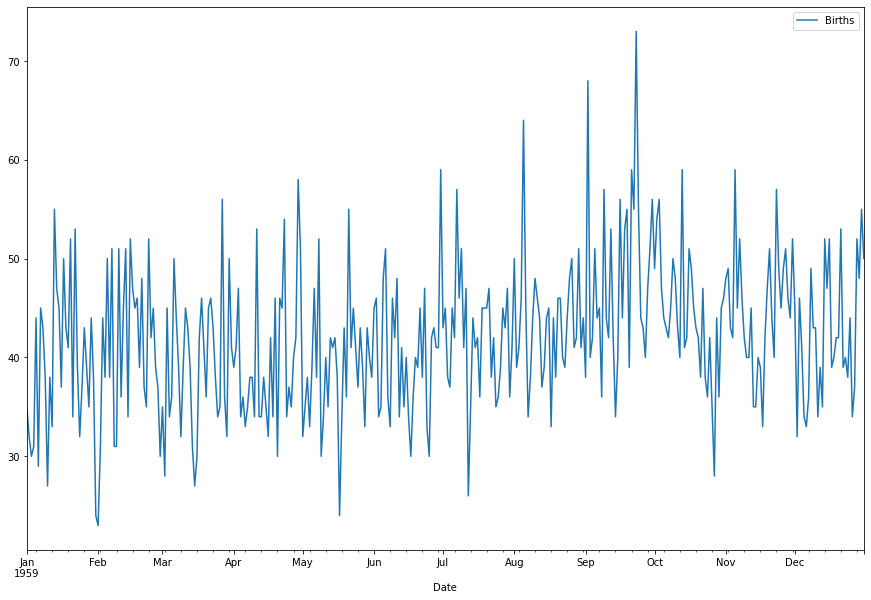

In [ ]:
#plotting the values
df.plot(figsize=(15,10))

In [ ]:
#checking the length of the data frame
len(df)

365

In [ ]:
#rnn can work on non stationary data as well.
#dividing the data into test and train 
train = df.iloc[:334]
test = df.iloc[334:] 

In [ ]:
#importing min-max scaler for data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#showing the head and tail of the data set
df.head(), df.tail()

(            Births
 Date              
 1959-01-01      35
 1959-01-02      32
 1959-01-03      30
 1959-01-04      31
 1959-01-05      44,             Births
 Date              
 1959-12-27      37
 1959-12-28      52
 1959-12-29      48
 1959-12-30      55
 1959-12-31      50)

In [ ]:
#transforming the data between 0 and 1 
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
#testing if the values are between 0 and 1 
scaled_test[:10]

array([[0.44],
       [0.18],
       [0.46],
       [0.36],
       [0.22],
       [0.2 ],
       [0.26],
       [0.52],
       [0.4 ],
       [0.4 ]])

In [ ]:
#selecting the number of inputs and setting the generator 
from keras.preprocessing.sequence import TimeseriesGenerator
input_data = 12
feautures= 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length =input_data , batch_size =1)

In [ ]:
#importing libraries for our model 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM

In [ ]:
#defining our model 
model = Sequential()
model.add(LSTM(200,activation ='relu', input_shape= (input_data, feautures)))
model.add(Dense(1)) #final output layer 
model.compile(optimizer='adam', loss= 'mse')


In [ ]:
#fitting the model
model.fit(generator, epochs = 50 )

Epoch 1/50
322/322 [==============================] - 4s 12ms/step - loss: 0.0044
Epoch 2/50
322/322 [==============================] - 4s 12ms/step - loss: 0.0045
Epoch 3/50
322/322 [==============================] - 4s 12ms/step - loss: 0.0048
Epoch 4/50
322/322 [==============================] - 4s 11ms/step - loss: 0.0056
Epoch 5/50
322/322 [==============================] - 4s 12ms/step - loss: 0.0045
Epoch 6/50
322/322 [==============================] - 4s 11ms/step - loss: 0.0052
Epoch 7/50
322/322 [==============================] - 4s 11ms/step - loss: 0.0043
Epoch 8/50
322/322 [==============================] - 4s 12ms/step - loss: 0.0056
Epoch 9/50
322/322 [==============================] - 4s 12ms/step - loss: 0.0040
Epoch 10/50
322/322 [==============================] - 4s 11ms/step - loss: 0.0044
Epoch 11/50
322/322 [==============================] - 4s 12ms/step - loss: 0.0045
Epoch 12/50
322/322 [==============================] - 4s 11ms/step - loss: 0.0042
Epoch 13/50
3

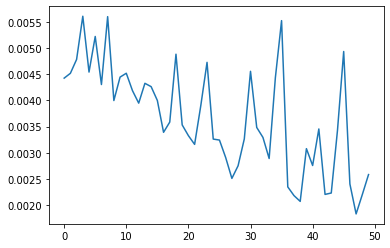

In [ ]:
#plotting the loss
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
#taking the last trained batch to predict the first element 
last_trained_batch = scaled_train[-12:]

In [ ]:
last_trained_batch = last_trained_batch.reshape(1,input_data,feautures)

In [ ]:
model.predict(last_trained_batch)


array([[0.39372367]], dtype=float32)

In [ ]:
#compairing with the first value of test data
scaled_test[0]


array([0.44])

In [ ]:
#predictions 
test_predictions =[]
first_eval_batch = scaled_train[-input_data:]
current_batch = first_eval_batch.reshape(1,input_data,feautures)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis= 1)
    

In [ ]:
test_predictions

[array([0.39372367], dtype=float32),
 array([0.40019011], dtype=float32),
 array([0.48577037], dtype=float32),
 array([0.3323692], dtype=float32),
 array([0.28651702], dtype=float32),
 array([0.2986745], dtype=float32),
 array([0.34897238], dtype=float32),
 array([0.24042475], dtype=float32),
 array([0.23267454], dtype=float32),
 array([0.2630964], dtype=float32),
 array([0.3488281], dtype=float32),
 array([0.42973715], dtype=float32),
 array([0.31101605], dtype=float32),
 array([0.20262673], dtype=float32),
 array([0.496939], dtype=float32),
 array([0.43814856], dtype=float32),
 array([0.50450623], dtype=float32),
 array([0.56626606], dtype=float32),
 array([0.6240038], dtype=float32),
 array([0.67083585], dtype=float32),
 array([0.72948277], dtype=float32),
 array([0.83523345], dtype=float32),
 array([0.5179765], dtype=float32),
 array([0.42044103], dtype=float32),
 array([0.13858414], dtype=float32),
 array([0.07068168], dtype=float32),
 array([0.29835007], dtype=float32),
 array([0

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


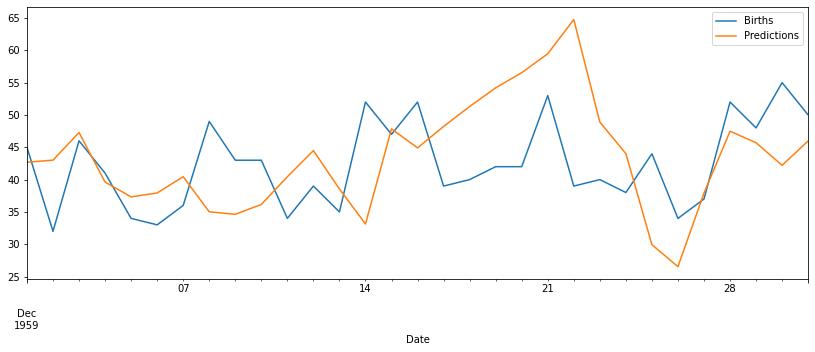

In [ ]:
#compairing the actual values with the predicted ones
test.plot(figsize=(14,5))

In [ ]:
#calculating the root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Births'],test['Predictions']))
print(rmse)

9.576721958315206


In [ ]:
#compairing the actual values with the predicted ones 
test

,Births,Predictions
Date,,
1959-12-01,45,42.686183
1959-12-02,32,43.009506
1959-12-03,46,47.288519
1959-12-04,41,39.618460
1959-12-05,34,37.325851
1959-12-06,33,37.933725
1959-12-07,36,40.448619
1959-12-08,49,35.021238
1959-12-09,43,34.633727
